<a href="https://colab.research.google.com/github/Tabish247/CV/blob/main/Demand_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Simulating Sample Grocery Sales Data
data = {
    "date": pd.date_range(start="2023-01-01", periods=100, freq='D'),
    "sales": np.random.randint(50, 200, size=100) + np.sin(np.linspace(0, 10, 100)) * 20
}
df = pd.DataFrame(data)
df["day_of_week"] = df["date"].dt.dayofweek

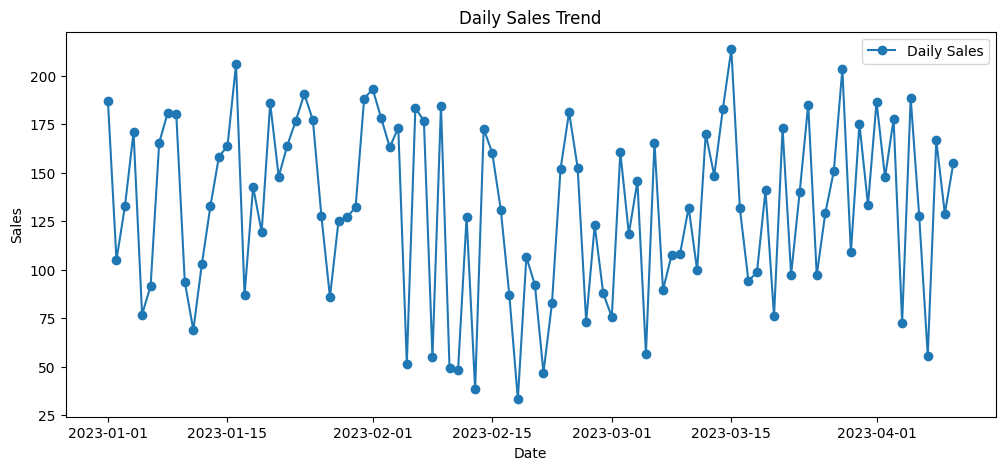

In [5]:
# Basic Visualization
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['sales'], marker='o', linestyle='-', label='Daily Sales')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Trend")
plt.legend()
plt.show()

                      date       sales  day_of_week
count                  100  100.000000   100.000000
mean   2023-02-19 12:00:00  132.173863     3.000000
min    2023-01-01 00:00:00   33.184935     0.000000
25%    2023-01-25 18:00:00   96.500916     1.000000
50%    2023-02-19 12:00:00  132.870116     3.000000
75%    2023-03-16 06:00:00  172.745721     5.000000
max    2023-04-10 00:00:00  213.737642     6.000000
std                    NaN   45.049887     2.035046


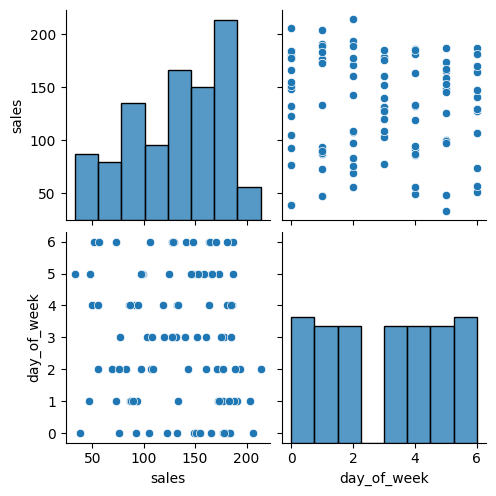

In [6]:
# Simple EDA
print(df.describe())
sns.pairplot(df)
plt.show()

In [7]:
# Splitting Data
X = df[['day_of_week']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# ML Model - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Mean Absolute Error: 44.00082605507888
Mean Squared Error: 2337.108044876717
